In [ ]:
Price Prediction of Used Cars

In [ ]:
In this note book we first scrap the listing s of the ads posted on the site Avito. using Beautiful Soup.



In [2]:
#importing the required libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
# for data visualisation and statistical analysis
import numpy as np
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline


/Users/manaswithachimakurthi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
def get_ads_urls():
    urls_list = []
    # define the basic url to crawl on
    basic_url = "https://www.avito.ma/fr/maroc/voitures-à_vendre?mpr=500000000&o="
    # loop over the paginated urls
    for i in range(1,250):
        # get the page url
        url = basic_url+str(i)
        #print(url)
        # get the request response
        r  = requests.get(url)
        data = r.text
        # transform it to bs object
        soup = BeautifulSoup(data, "lxml")
        # loop over page links
        for div in soup.findAll('div', {'class': 'item-img'}):
            a = div.findAll('a')[0]
            urls_list.append(a.get('href'))


    df = pd.DataFrame(data={"url": urls_list})
    df.to_csv("./carsdata/ads_urls.csv", sep=',',index=False)
get_ads_urls()

https://www.avito.ma/fr/maroc/voitures-à_vendre?mpr=500000000&o=1
https://www.avito.ma/fr/maroc/voitures-à_vendre?mpr=500000000&o=2
https://www.avito.ma/fr/maroc/voitures-à_vendre?mpr=500000000&o=3
https://www.avito.ma/fr/maroc/voitures-à_vendre?mpr=500000000&o=4


'https://www.avito.ma/fr/casablanca/voitures/dacia_dacia_31157519.htm'

In [10]:
def scrap_ad_data(ad_url):
    r = requests.get(ad_url)
    data = r.text
    soup = BeautifulSoup(data, "html.parser")
    target_component = soup.findAll("h2",  {"class": ["font-normal", "fs12", "no-margin", "ln22"]})
    # create a list that will hold our component data
    results = []
    for i in target_component:
        results.append(''.join(i.findAll(text=True)).replace('\n',''))
    return results

In [14]:
def write_data_to_csv(data):
    with open("./carsdata/output.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(data)

In [15]:
urls_data = pd.read_csv("./carsdata/ads_urls.csv")
# create  a list that will hold the final data
final_result = []
i = 1
# loop over the dataframe
for index, row in urls_data.iterrows():
    final_result.append(scrap_ad_data(row['url']))
    # to count how many page we have processed since qe have 35 links per page
    #i += 1
    #if i%100 == 0:
    #    print("page ",i, "done")
print('Scrapping data finished')
# now that we have all the data we can write it in a csv file
write_data_to_csv(final_result)

Scrapping data finished


In [4]:
colnames=['price', 'year_model', 'mileage', 'fuel_type', 'mark', 'model', 'fiscal_power', 'sector', 'type', 'city'] 
# read the csv file as a dataframe
df = pd.read_csv("./output.csv", sep=",", names=colnames, header=None)
# let's get some simple vision on our dataset
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,56 000 DH,Année-Modèle:1997,Kilométrage:200 000 - 249 999,Type de carburant:Diesel,Marque:Volkswagen,Modèle:GOLF 3,Puissance fiscale:8 CV,-,"Type:Voitures, Offre",Tan-Tan
1,75 000 DH,Année-Modèle:2008,Kilométrage:15 000 - 19 999,Type de carburant:Diesel,Marque:Peugeot,Modèle:407,Puissance fiscale:8 CV,Secteur:autre_secteur,"Type:Voitures, Offre",Kénitra
2,85 000 DH,Année-Modèle:2015,Kilométrage:55 000 - 59 999,Type de carburant:Diesel,Marque:Ford,Modèle:Focus,Puissance fiscale:8 CV,Secteur:centre_ville,"Type:Voitures, Offre",Casablanca
3,118 000 DH,Année-Modèle:2014,Kilométrage:10 000 - 14 999,Type de carburant:Diesel,Marque:Dacia,Modèle:Lodgy,Puissance fiscale:6 CV,-,"Type:Voitures, Offre",Casablanca
4,85 000 DH,Année-Modèle:2015,Kilométrage:15 000 - 19 999,Type de carburant:Diesel,Marque:Dacia,Modèle:LOGAN MCV,Puissance fiscale:-,Secteur:toute_la_ville,"Type:Voitures, Offre",Barkine


In [5]:
df = df[df.price.str.contains("DH") == True]
# remove the 'DH' caracters from the price
df.price = df.price.map(lambda x: x.rstrip('DH'))
# remove the space on it
df.price = df.price.str.replace(" ","")
# change it to integer value
df.price = pd.to_numeric(df.price, errors = 'coerce', downcast= 'integer')

In [6]:
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,56000,Année-Modèle:1997,Kilométrage:200 000 - 249 999,Type de carburant:Diesel,Marque:Volkswagen,Modèle:GOLF 3,Puissance fiscale:8 CV,-,"Type:Voitures, Offre",Tan-Tan
1,75000,Année-Modèle:2008,Kilométrage:15 000 - 19 999,Type de carburant:Diesel,Marque:Peugeot,Modèle:407,Puissance fiscale:8 CV,Secteur:autre_secteur,"Type:Voitures, Offre",Kénitra
2,85000,Année-Modèle:2015,Kilométrage:55 000 - 59 999,Type de carburant:Diesel,Marque:Ford,Modèle:Focus,Puissance fiscale:8 CV,Secteur:centre_ville,"Type:Voitures, Offre",Casablanca
3,118000,Année-Modèle:2014,Kilométrage:10 000 - 14 999,Type de carburant:Diesel,Marque:Dacia,Modèle:Lodgy,Puissance fiscale:6 CV,-,"Type:Voitures, Offre",Casablanca
4,85000,Année-Modèle:2015,Kilométrage:15 000 - 19 999,Type de carburant:Diesel,Marque:Dacia,Modèle:LOGAN MCV,Puissance fiscale:-,Secteur:toute_la_ville,"Type:Voitures, Offre",Barkine


In [ ]:
Year Model¶


In [7]:
# remove thos rows doesn't contain the year_model value
df = df[df.year_model.str.contains("Année-Modèle") == True]
# remove the 'Année-Modèle:' from the year_model
df.year_model = df.year_model.map(lambda x: x.lstrip('Année-Modèle:').rstrip('ou plus ancien'))
# df.year_model = df.year_model.map(lambda x: x.lstrip('Plus de '))
# remove those lines having the year_model not set
df = df[df.year_model != ' -']
df = df[df.year_model != '']
# change it to integer value
df.year_model = pd.to_numeric(df.year_model, errors = 'coerce', downcast = 'integer')


In [8]:
df = df[df.mileage.str.contains("Kilométrage") == True]
# remove the 'Kilométrage:' string from the mileage feature 
df.mileage = df.mileage.map(lambda x: x.lstrip('Kilométrage:'))
df.mileage = df.mileage.map(lambda x: x.lstrip('Plus de '))
# remove those lines having the mileage values null or '-'
df = df[df.mileage != '-']
# we have only one value type that is equal to 500 000, all the other ones contain two values
if any(df.mileage != '500 000'):
    # create two columns minim and maxim to calculate the mileage mean
    df['minim'], df['maxim'] = df.mileage.str.split('-', 1).str
    # remove spaces from the maxim & minim values 
    df['maxim'] = df.maxim.str.replace(" ","")
    df['minim'] = df.minim.str.replace(" ","")
    df['maxim'] = df['maxim'].replace(np.nan, 500000)
    # calculate the mean of mileage 
    df.mileage = df.apply(lambda row: (int(row.minim) + int(row.maxim)) / 2, axis=1)
    # now that the mileage is calculated so we do not need the minim and maxim values anymore
    df = df.drop(columns=['minim', 'maxim'])

In [9]:
df.fuel_type = df.fuel_type.map(lambda x: x.lstrip('Type de carburant:'))

In [10]:
df['mark'] = df['mark'].map(lambda x: x.replace('Marque:', ''))
df = df[df.mark != '-']
# remove the 'Modèle:' string from model feature 
df['model'] = df['model'].map(lambda x: x.replace('Modèle:', ''))


In [23]:
df.fiscal_power.value_counts()

Puissance fiscale:-                3161
Puissance fiscale:6 CV             1887
Puissance fiscale:8 CV             1331
Puissance fiscale:7 CV             1009
Puissance fiscale:9 CV              355
Puissance fiscale:5 CV              207
Puissance fiscale:11 CV             199
Puissance fiscale:10 CV             183
Puissance fiscale:12 CV             143
Puissance fiscale:4 CV               41
Puissance fiscale:13 CV              23
Puissance fiscale:17 CV              18
Puissance fiscale:14 CV              14
Puissance fiscale:18 CV               8
Puissance fiscale:15 CV               8
Puissance fiscale:16 CV               6
Puissance fiscale:20 CV               6
Puissance fiscale:21 CV               4
Puissance fiscale:Plus de 48 CV       4
Puissance fiscale: -                  3
Puissance fiscale:-                   3
Puissance fiscale:31 CV               2
Puissance fiscale:19 CV               2
Puissance fiscale:27 CV               2
Puissance fiscale:24 CV               2


In [11]:
# remove the 'Puissance fiscale:' from the fiscal_power feature
df.fiscal_power = df.fiscal_power.map(lambda x: x.lstrip('Puissance fiscale:Plus de').rstrip(' CV'))
# replace the - with NaN values and convert them to integer values
df.fiscal_power = df.fiscal_power.str.replace("-","0")
# convert all fiscal_power values to numerical ones 
df.fiscal_power = pd.to_numeric(df.fiscal_power, errors = 'coerce', downcast= 'integer')
# now we need to fill those 0 values with the mean of all fiscal_power columns
df.fiscal_power = df.fiscal_power.map( lambda x : df.fiscal_power.mean() if x == 0 else x )


In [12]:
# remove those lines having the fuel_type not set
df = df[df.fuel_type != '-']

In [13]:
df = df.drop(columns=['sector', 'type'])

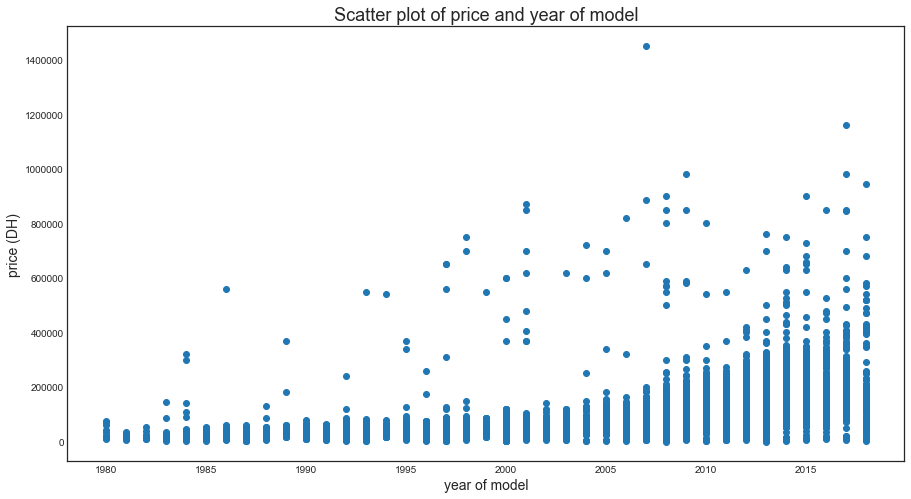

In [27]:
#EDA
##price distribution by year_model
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.year_model,df.price)
plt.ylabel("price (DH)", fontsize=14)
plt.xlabel("year of model", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

Price distribution by mark


In [28]:
df.head()

,price,year_model,mileage,fuel_type,mark,model,fiscal_power,city
0,56000,1997,224999.5,Diesel,Volkswagen,GOLF 3,8.000000,Tan-Tan
1,75000,2008,17499.5,Diesel,Peugeot,407,8.000000,Kénitra
2,85000,2015,57499.5,Diesel,Ford,Focus,8.000000,Casablanca
3,118000,2014,12499.5,Diesel,Dacia,Lodgy,6.000000,Casablanca
4,85000,2015,17499.5,Diesel,Dacia,LOGAN MCV,4.771468,Barkine


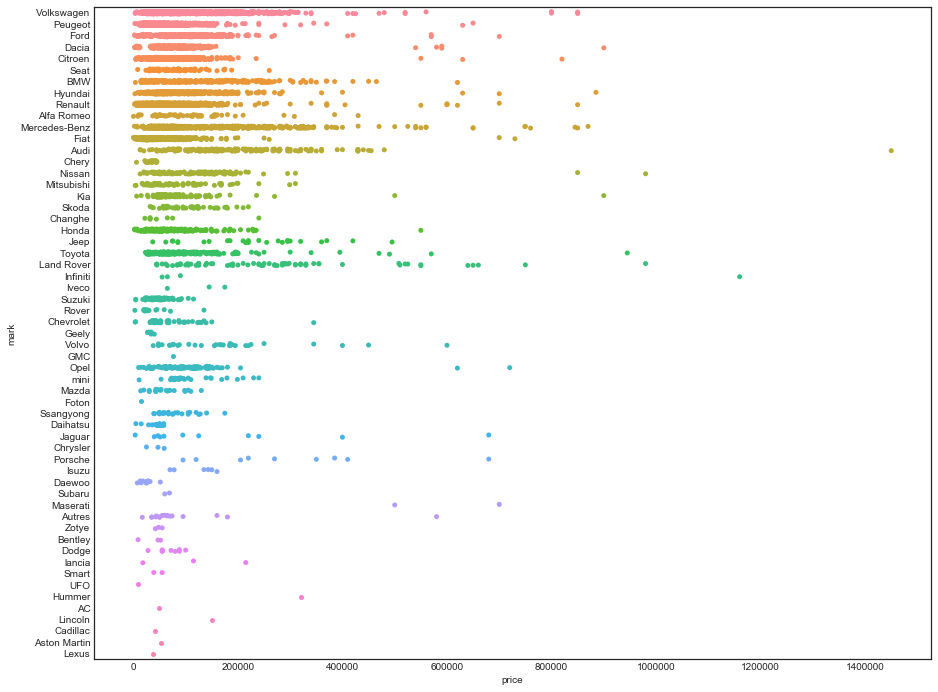

In [14]:
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = df, x='price', y='mark', jitter=.1)
plt.show()

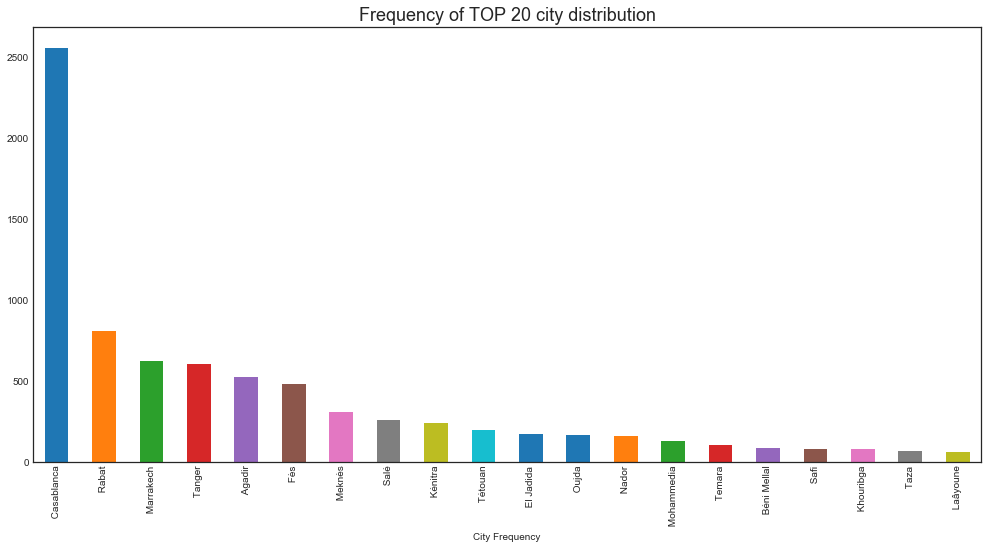

In [15]:
#city distribution
plt.figure(figsize=(17,8))
df.city.value_counts().nlargest(20).plot(kind='bar')
plt.xlabel('City Frequency')
plt.title("Frequency of TOP 20 city distribution",fontsize=18)
plt.show()

NameError: name 'X' is not defined

In [16]:
#df = df.drop(columns=['sector', 'type'])
data = df[df.price < 400000]
X = data[['year_model', 'mileage', 'fiscal_power', 'fuel_type', 'mark']]
Y = data.price
X = pd.get_dummies(data=X)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

/Users/manaswithachimakurthi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


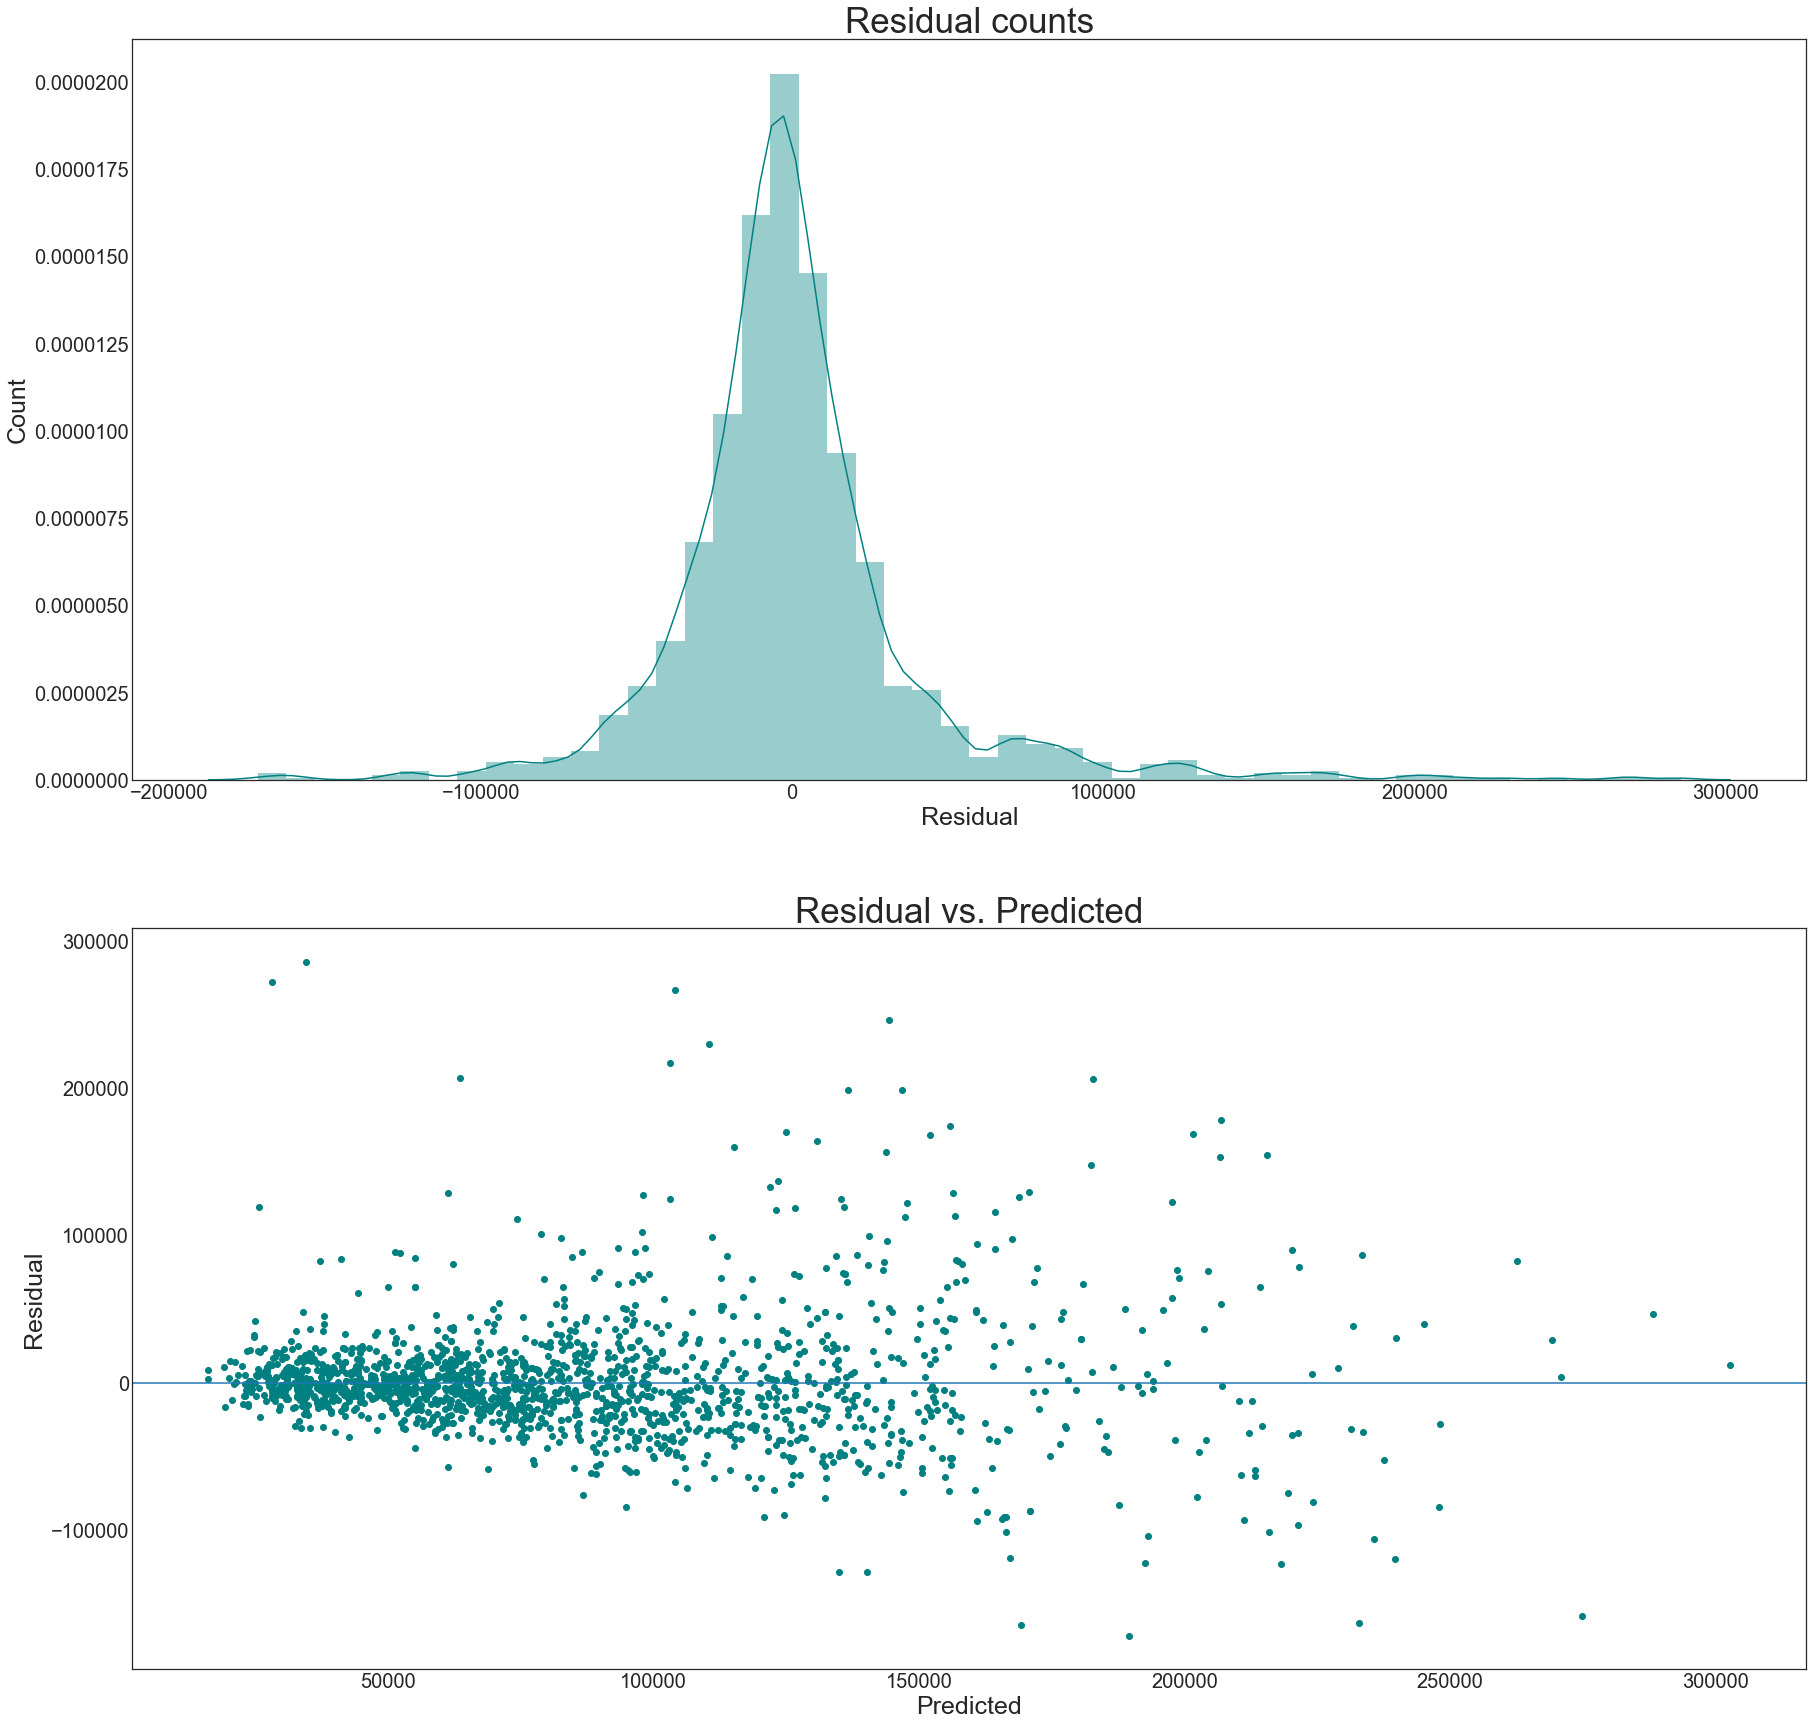

RMSE:
40558.527794536196


In [18]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

/Users/manaswithachimakurthi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


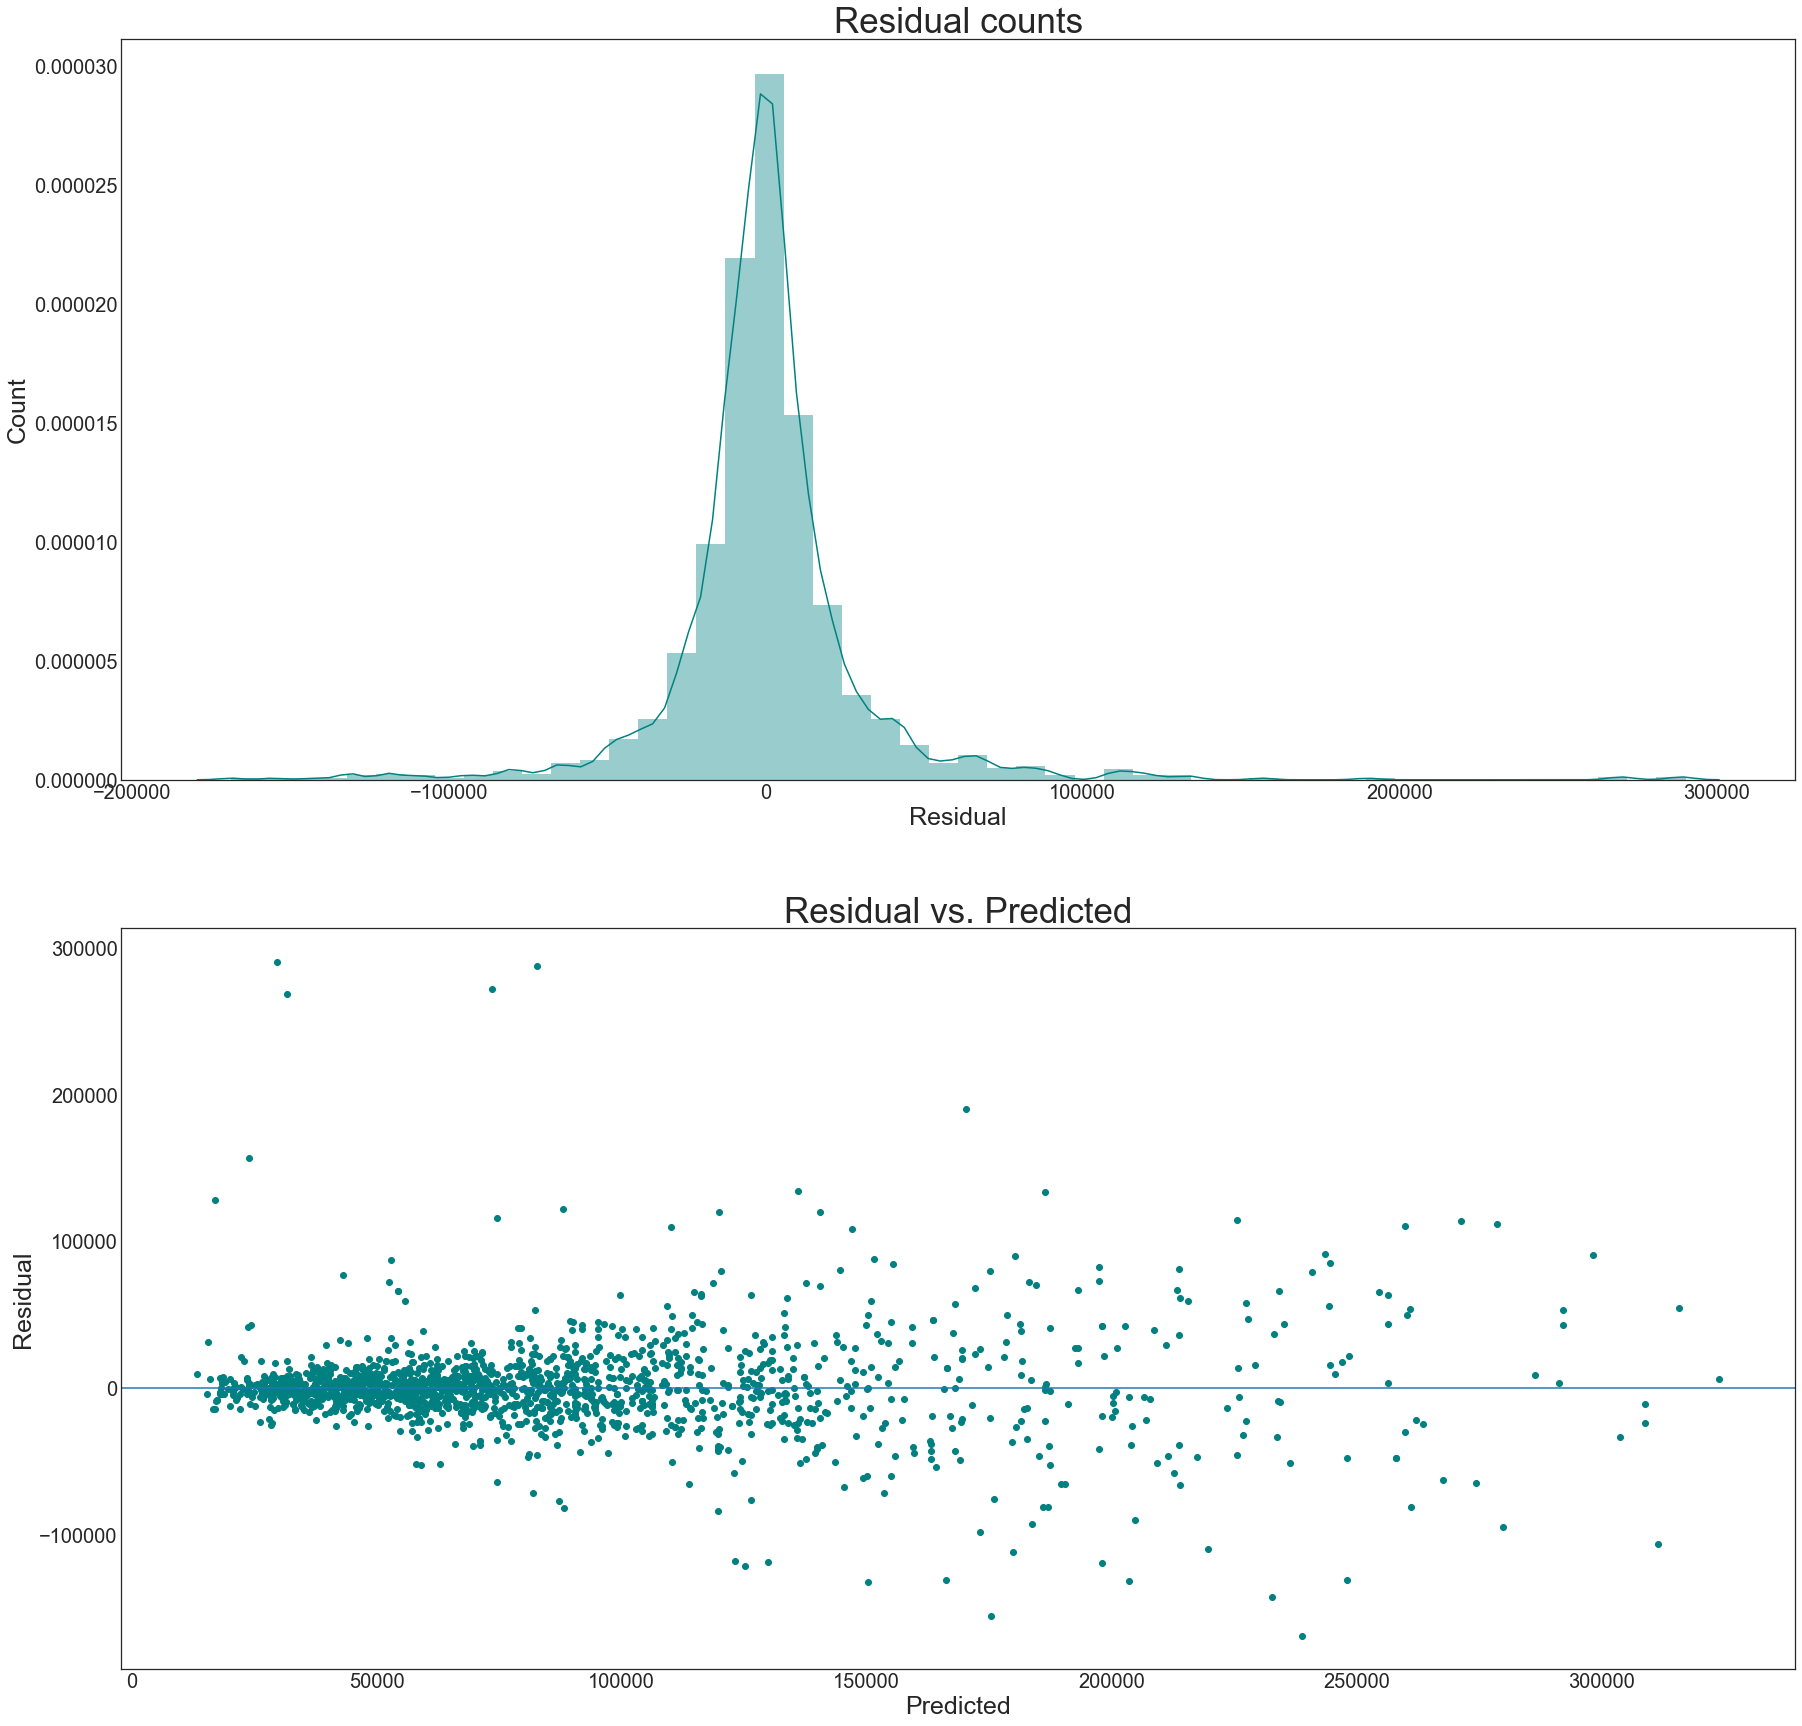


Cross Validation Scores:
[0.67769693 0.77771479 0.77184921 0.72417098 0.72146206 0.77712789
 0.73343356 0.67165313 0.68893402 0.74940857 0.73738973 0.74542435]

Mean Score:
0.7313554358450491

RMSE:
31101.521028722567


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

In [19]:
X_train.head()

,year_model,mileage,fiscal_power,fuel_type_Diesel,fuel_type_Electrique,fuel_type_Essence,fuel_type_LPG,mark_AC,mark_Alfa Romeo,mark_Aston Martin,...,mark_Ssangyong,mark_Subaru,mark_Suzuki,mark_Toyota,mark_UFO,mark_Volkswagen,mark_Volvo,mark_Zotye,mark_lancia,mark_mini
6420,2003,2499.5,6.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561,2011,144999.5,8.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4806,2013,97499.5,4.771468,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,2016,87499.5,6.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7007,2011,104999.5,11.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
from flask import Flask, abort, jsonify, request, render_template
from sklearn.externals import joblib
import numpy as np
import json

# load the built-in model 
gbr = joblib.load('model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/api', methods=['POST'])
def get_delay():
    result=request.form
    year_model = result['year_model']
    mileage = result['mileage']
    mark = result['mark']
    fiscal_power = result['fiscal_power']
    fuel_type = result['fuel_type']
    # we create a json object that will hold data from user inputs
    user_input = {'year_model':year_model, 'mileage':mileage, 'fiscal_power':fiscal_power, 'fuel_type':fuel_type, 'mark':mark}
    # encode the json object to one hot encoding so that it could fit our model
    a = input_to_one_hot(user_input)
    # get the price prediction
    price_pred = gbr.predict([a])[0]
    price_pred = round(price_pred, 2)
    # return a json value
    return json.dumps({'price':price_pred});

if __name__ == '__main__':
    app.run(port=8080, debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

predict ing the unseen observation


In [21]:
user_input = {'year_model':2009, 'mileage':8499.5, 'fiscal_power':9, 'fuel_type':'Diesel', 'mark':'Dacia'}
def input_to_one_hot(data):
    # initialize the target vector with zero values
    enc_input = np.zeros(63)
    # set the numerical input as they are
    enc_input[0] = data['year_model']
    enc_input[1] = data['mileage']
    enc_input[2] = data['fiscal_power']
    ##################### Mark #########################
    # get the array of marks categories
    marks = df.mark.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'mark_'+data['mark']
    # search for the index in columns name list 
    mark_column_index = X.columns.tolist().index(redefinded_user_input)
    #print(mark_column_index)
    # fullfill the found index with 1
    enc_input[mark_column_index] = 1
    ##################### Fuel Type ####################
    # get the array of fuel type
    fuel_types = df.fuel_type.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'fuel_type_'+data['fuel_type']
    # search for the index in columns name list 
    fuelType_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[fuelType_column_index] = 1
    return enc_input

In [22]:
a=input_to_one_hot(user_input)

In [59]:
a.shape

(63,)

In [23]:
price_pred = gbr.predict([a])

NameError: name 'gbr' is not defined

In [67]:
price_pred[0]

90830.92717348192

In [68]:
##implementing flask and storing the model.

from sklearn.externals import joblib

joblib.dump(gbr, 'model.pkl')





['model.pkl']

In [69]:
gbr = joblib.load('model.pkl')

In [70]:
print("the best price for this Dacia is",gbr.predict([a])[0])


the best price for this Dacia is 90830.92717348192


In [71]:

from flask import Flask, abort, jsonify, request, render_template
from sklearn.externals import joblib
import numpy as np
import json

# load the built-in model 
gbr = joblib.load('model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/api', methods=['POST'])
def get_delay():
    result=request.form
    year_model = result['year_model']
    mileage = result['mileage']
    mark = result['mark']
    fiscal_power = result['fiscal_power']
    fuel_type = result['fuel_type']
    # we create a json object that will hold data from user inputs
    user_input = {'year_model':year_model, 'mileage':mileage, 'fiscal_power':fiscal_power, 'fuel_type':fuel_type, 'mark':mark}
    # encode the json object to one hot encoding so that it could fit our model
    a = input_to_one_hot(user_input)
    # get the price prediction
    price_pred = gbr.predict([a])[0]
    price_pred = round(price_pred, 2)
    # return a json value
    return json.dumps({'price':price_pred});

if __name__ == '__main__':
    app.run(port=8080, debug=True)

UnsupportedOperation: not writable